# Data Collection 

In [1]:
import yfinance as yf

In [2]:
data=yf.download('SBIN.NS',period='5y')
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-15,292.600006,301.299988,292.500000,298.399994,285.577362,37928480
2019-03-18,298.899994,300.899994,294.649994,298.950012,286.103760,23782967
2019-03-19,300.149994,306.600006,299.149994,303.049988,290.027557,27218691
2019-03-20,302.799988,304.649994,300.049988,303.799988,290.745300,18820555
2019-03-22,304.299988,306.399994,296.950012,298.049988,285.242401,17865957
...,...,...,...,...,...,...
2024-03-11,790.000000,792.799988,770.549988,773.700012,773.700012,16778340
2024-03-12,770.000000,777.750000,757.349976,759.700012,759.700012,21529705
2024-03-13,758.650024,763.700012,743.000000,747.250000,747.250000,27950252


In [3]:
df=data[['Close']]
df

,Close
Date,
2019-03-15,298.399994
2019-03-18,298.950012
2019-03-19,303.049988
2019-03-20,303.799988
2019-03-22,298.049988
...,...
2024-03-11,773.700012
2024-03-12,759.700012
2024-03-13,747.250000


In [4]:
import matplotlib.pyplot as plt

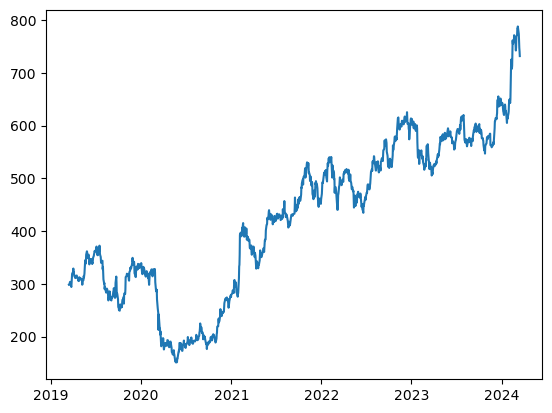

In [5]:
plt.plot(df['Close'])

# Preprocessing

In [8]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [7]:
mn=MinMaxScaler()

In [9]:
df1=pd.DataFrame(mn.fit_transform(df),columns=['close'])
df1

,close
0,0.231560
1,0.232423
2,0.238857
3,0.240035
4,0.231011
...,...
1231,0.977480
1232,0.955509
1233,0.935970
1234,0.926240


In [10]:
df1.index=df.index

In [11]:
df1

,close
Date,
2019-03-15,0.231560
2019-03-18,0.232423
2019-03-19,0.238857
2019-03-20,0.240035
2019-03-22,0.231011
...,...
2024-03-11,0.977480
2024-03-12,0.955509
2024-03-13,0.935970


# Lag

In [12]:
def lag1(df,lag):
    for i in range(lag):
        df[f'lag{i+1}']=df['close'].shift(i+1)
    df=df.dropna(axis=0)
    x=df.iloc[:,1:]
    y=df.iloc[:,0]
    return x,y

In [13]:
x,y=lag1(df1,60)

In [14]:
x

,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,...,lag51,lag52,lag53,lag54,lag55,lag56,lag57,lag58,lag59,lag60
Date,,,,,,,,,,,,,,,,,,,,,
2019-06-18,0.293471,0.302809,0.307046,0.303123,0.307988,0.303594,0.300063,0.291981,0.316306,0.321092,...,0.269774,0.263889,0.247881,0.239564,0.224655,0.231011,0.240035,0.238857,0.232423,0.231560
2019-06-19,0.296924,0.293471,0.302809,0.307046,0.303123,0.307988,0.303594,0.300063,0.291981,0.316306,...,0.279583,0.269774,0.263889,0.247881,0.239564,0.224655,0.231011,0.240035,0.238857,0.232423
2019-06-20,0.295041,0.296924,0.293471,0.302809,0.307046,0.303123,0.307988,0.303594,0.300063,0.291981,...,0.266243,0.279583,0.269774,0.263889,0.247881,0.239564,0.224655,0.231011,0.240035,0.238857
2019-06-21,0.304928,0.295041,0.296924,0.293471,0.302809,0.307046,0.303123,0.307988,0.303594,0.300063,...,0.268283,0.266243,0.279583,0.269774,0.263889,0.247881,0.239564,0.224655,0.231011,0.240035
2019-06-24,0.311598,0.304928,0.295041,0.296924,0.293471,0.302809,0.307046,0.303123,0.307988,0.303594,...,0.260829,0.268283,0.266243,0.279583,0.269774,0.263889,0.247881,0.239564,0.224655,0.231011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-11,1.000000,0.993487,0.993566,0.974890,0.970339,0.937304,0.928515,0.940050,0.954253,0.954488,...,0.764595,0.762555,0.773541,0.762084,0.791824,0.780995,0.780603,0.741996,0.736033,0.724341
2024-03-12,0.977480,1.000000,0.993487,0.993566,0.974890,0.970339,0.937304,0.928515,0.940050,0.954253,...,0.781073,0.764595,0.762555,0.773541,0.762084,0.791824,0.780995,0.780603,0.741996,0.736033
2024-03-13,0.955509,0.977480,1.000000,0.993487,0.993566,0.974890,0.970339,0.937304,0.928515,0.940050,...,0.785546,0.781073,0.764595,0.762555,0.773541,0.762084,0.791824,0.780995,0.780603,0.741996


In [15]:
y

Date
2019-06-18    0.296924
2019-06-19    0.295041
2019-06-20    0.304928
2019-06-21    0.311598
2019-06-24    0.317561
                ...   
2024-03-11    0.977480
2024-03-12    0.955509
2024-03-13    0.935970
2024-03-14    0.926240
2024-03-15    0.911880
Name: close, Length: 1176, dtype: float64

# Split

In [16]:
1176/100*80

940.8

In [17]:
n=940

In [18]:
x_train,y_train=x[0:n+1],y[0:n+1]
x_test,y_test=x[n+1:],y[n+1:]

# Model Fitting

In [19]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [20]:
nn=Sequential()

In [21]:
nn.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
nn.add(LSTM(128,return_sequences=True))
nn.add(Dropout(0.2))
nn.add(LSTM(128))

nn.add(Dense(1,activation='linear'))

# Compile The Model

In [23]:
nn.compile(loss='mse',optimizer='adam',metrics=['mae'])

# Fitting 

In [24]:
from keras.callbacks import EarlyStopping
early=EarlyStopping(monitor='loss',patience=5)

In [25]:
hist=nn.fit(x_train,y_train,batch_size=32,callbacks=[early],epochs=25)

Epoch 1/25
30/30 [==============================] - 21s 278ms/step - loss: 0.0310 - mae: 0.1352
Epoch 2/25
30/30 [==============================] - 8s 274ms/step - loss: 0.0097 - mae: 0.0762
Epoch 3/25
30/30 [==============================] - 8s 275ms/step - loss: 0.0083 - mae: 0.0710
Epoch 4/25
30/30 [==============================] - 8s 279ms/step - loss: 0.0078 - mae: 0.0685
Epoch 5/25
30/30 [==============================] - 8s 282ms/step - loss: 0.0071 - mae: 0.0666
Epoch 6/25
30/30 [==============================] - 8s 276ms/step - loss: 0.0064 - mae: 0.0641
Epoch 7/25
30/30 [==============================] - 9s 277ms/step - loss: 0.0054 - mae: 0.0583
Epoch 8/25
30/30 [==============================] - 8s 278ms/step - loss: 0.0036 - mae: 0.0483
Epoch 9/25
30/30 [==============================] - 8s 280ms/step - loss: 0.0034 - mae: 0.0468
Epoch 10/25
30/30 [==============================] - 8s 279ms/step - loss: 0.0028 - mae: 0.0414
Epoch 11/25
30/30 [=============================

# Plot The Result

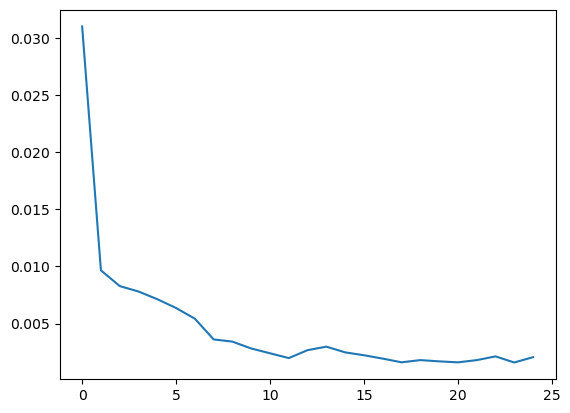

In [28]:
plt.plot(hist.history['loss'])

# Evaluation 

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# Testing Data Evaluation

In [30]:
ts_pred=nn.predict(x_test)
ts_pred

8/8 [==============================] - 3s 98ms/step


array([[0.5743885 ],
       [0.57306284],
       [0.57146466],
       [0.57025033],
       [0.56896967],
       [0.5681987 ],
       [0.5671818 ],
       [0.56660795],
       [0.56699467],
       [0.5676582 ],
       [0.5680285 ],
       [0.568863  ],
       [0.56969225],
       [0.57151735],
       [0.5740163 ],
       [0.5769731 ],
       [0.57986766],
       [0.5837155 ],
       [0.5872275 ],
       [0.59025896],
       [0.59381545],
       [0.5969292 ],
       [0.60033405],
       [0.6028905 ],
       [0.6051955 ],
       [0.6074256 ],
       [0.6098141 ],
       [0.6123002 ],
       [0.614919  ],
       [0.61736214],
       [0.61887014],
       [0.6202555 ],
       [0.62157524],
       [0.62296593],
       [0.62421453],
       [0.6251631 ],
       [0.62619287],
       [0.6275926 ],
       [0.62870044],
       [0.6288793 ],
       [0.62910444],
       [0.6295263 ],
       [0.62991506],
       [0.63022524],
       [0.63082343],
       [0.6314508 ],
       [0.63153934],
       [0.631

In [31]:
y_pred=mn.inverse_transform(ts_pred)
y_pred

array([[516.85034],
       [516.0056 ],
       [514.98724],
       [514.2135 ],
       [513.39746],
       [512.9062 ],
       [512.25824],
       [511.89258],
       [512.139  ],
       [512.56177],
       [512.7977 ],
       [513.32947],
       [513.8579 ],
       [515.0208 ],
       [516.61316],
       [518.49725],
       [520.3417 ],
       [522.7935 ],
       [525.0314 ],
       [526.963  ],
       [529.2292 ],
       [531.21326],
       [533.3828 ],
       [535.0118 ],
       [536.4806 ],
       [537.90155],
       [539.4235 ],
       [541.0077 ],
       [542.6764 ],
       [544.23315],
       [545.19403],
       [546.0768 ],
       [546.9177 ],
       [547.8039 ],
       [548.5995 ],
       [549.2039 ],
       [549.8601 ],
       [550.752  ],
       [551.4579 ],
       [551.5719 ],
       [551.71533],
       [551.98413],
       [552.2319 ],
       [552.4295 ],
       [552.81067],
       [553.2104 ],
       [553.26685],
       [553.33813],
       [553.32544],
       [553.32086],


In [32]:
y_test

Date
2023-04-03    0.589925
2023-04-05    0.584040
2023-04-06    0.591337
2023-04-10    0.589218
2023-04-11    0.598321
                ...   
2024-03-11    0.977480
2024-03-12    0.955509
2024-03-13    0.935970
2024-03-14    0.926240
2024-03-15    0.911880
Name: close, Length: 235, dtype: float64

In [34]:
y_test1=mn.inverse_transform([y_test])
y_test1

array([[526.75      , 523.        , 527.65002441, 526.29998779,
        532.09997559, 528.20001221, 532.95001221, 544.        ,
        545.84997559, 540.29998779, 544.79998779, 543.15002441,
        554.59997559, 561.79998779, 566.34997559, 564.75      ,
        578.29998779, 575.29998779, 570.5       , 580.        ,
        576.5       , 583.59997559, 573.5       , 572.20001221,
        573.45001221, 578.15002441, 581.90002441, 586.29998779,
        586.29998779, 574.20001221, 575.15002441, 577.15002441,
        581.59997559, 582.70001221, 581.25      , 586.        ,
        595.        , 592.79998779, 579.84997559, 582.75      ,
        587.20001221, 587.20001221, 585.34997559, 589.20001221,
        588.5       , 578.70001221, 578.65002441, 576.40002441,
        576.54998779, 566.5       , 571.25      , 568.84997559,
        567.40002441, 566.34997559, 562.95001221, 554.59997559,
        557.04998779, 566.09997559, 569.79998779, 572.84997559,
        585.45001221, 589.25      , 590.

In [35]:
mse=mean_squared_error(y_pred,y_test1.flatten())
mae=mean_absolute_error(y_pred,y_test1.flatten())
r2=r2_score(y_pred,y_test1.flatten())
rmse=mse**0.5

In [36]:
print('MSE:',mse)
print('MAE:',mae)
print('RMSE:',rmse)
print('R2:',r2)

MSE: 3060.3450155159894
MAE: 42.104121301529254
RMSE: 55.320385171435575
R2: -2.979743085058413
